# Hopfield Network

This notebook provides a practical demonstration of Hopfield networks, a type of recurrent artificial neural network. Hopfield networks are known for their ability to store patterns and retrieve them from partial or noisy inputs, making them a simple model for associative memory.

The Hopfield network is implemented as a class `HopfieldNetwork`.
The class together with other useful functions is stored in the file `hopfield.py`.

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import HopfiledNetwork class and other utility functions
from hopfield import *

## Load the dataset

First, we load the dataset containing patterns of the size $8 \times 8$.
They are stored in a file `patterns8.csv`. Each row of the file starts with a name of the pattern following by 64 itegers (-1 or +1).

All patterns can be loaded using function `load_patterns()`. The function returns a dictionary, where _keys_ are the names of the patterns (strings) and _values_ are NumPy arrays storing the 64 pixels.

In [3]:
patterns = load_patterns("patterns8.csv")

num_patterns = len(patterns)  # Number of loaded patterns

# Print the names of the patterns
print(f"Number of patterns: {num_patterns:d}")
print("Names of the patterns:")
for name in patterns.keys():
    print(f"{' ':>3}{name:}")

Number of patterns: 8
Names of the patterns:
   smile
   alien
   house
   rocket
   battery
   cross
   cat
   car


You can display a pattern using `display_pattern` function. The input has to be a NumPy array of length 64 or (8,8). Moreover, you can set optional parameter:
* width (integer): figure width in pixels (default 600)
* height (iteger): figure height in pixels (default 600)
* dpi (integer): dots per inch (default 96)
* title (string): figure title (defaul None)

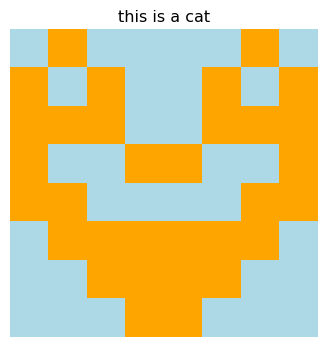

In [4]:
# Display pattern
display_pattern(patterns["cat"], width=400, height=400, dpi=96, title="this is a cat")

You can use `display_pattern` function to save a picture by specifying the `figname` (string). 
It will save the picture as a png file.

In [5]:
# Name of the file
figname = "pattern_cat.png"

# Save figure
display_pattern(patterns["cat"], width=400, height=400, dpi=96, title="this is a cat", figname=figname)

## Hopfield Network

Hopfield Network is a fully connected neural network of $N$ neurons; each neuron has a direct connection to each other. The weigths between the nerons, $w_{ij}$, obeying conditions 
\begin{align*}
    w_{ii} &= 0\,,\\
    w_{ij} &= w_{ji}\,, 
\end{align*}    
where $i, j \in \{1, 2, \dots, N\}$ are the indices of the neurons.
For more informations on Hopfield Networks you can follow the links
* [Wikipedia](https://en.wikipedia.org/wiki/Hopfield_network)
* [geeksforgeeks.org](https://www.geeksforgeeks.org/hopfield-neural-network/)
* [PRIMO.ai](https://primo.ai/index.php/Hopfield_Network_%28HN%29)

Hore, Hopfield Network is implemented as a class called `HopfieldNetwork` defined in `hopfield.py`.
To start using it we need to instantiate a new Hopfield network and specify number of neurons in the network by setting `n_neurons` (integer). 

To study patterns of $8\times 8$ each pixel will be treated as an input to one neuron. Thus, the number of neurons has to be the same as the number of pixels `n_neurons = 64`.

In [6]:
# Instantiate a Hopfield Network
hopnet = HopfieldNetwork(n_neurons=64)

All the weights of the Hopfield network are initialized to zero. The weights can be reviewed using method `get_weight()`, which returns a NumPy array containing all the weights of the Hopfield Network.


In [7]:
# Get all weights of the Hopfield Network
W0 = hopnet.get_weights()

# Print shape of the weights matrix
print(f"Weight matrix shape: {W0.shape}")
# Print the weight matrix
print("Weights matrix:")
print(W0)

Weight matrix shape: (64, 64)
Weights matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Training

Once having an initialized Hopfield Network, we can use training dataset to set its weights.
For simplicity, we shall use just 4 patterns from the dictionary to train the network.

In [8]:
# Prepare dataset for the training (first 4 patterns)
dataset = list(patterns.values())[:4]

# Print size of the training dataset
print(f"Training dataset size: {len(dataset):d}")

Training dataset size: 4


The traininig is done using `train()` method, which takes a list of training data as its argument.

In [9]:
# Train Hopfield network using the training dataset
hopnet.train(dataset)

Now, we can check the weight matrix. To visualize the trained weights we shall plot them as a heatmap.
In the heatmap, each pixel represents one weight and its value is given by the color as shown on the colorscale.

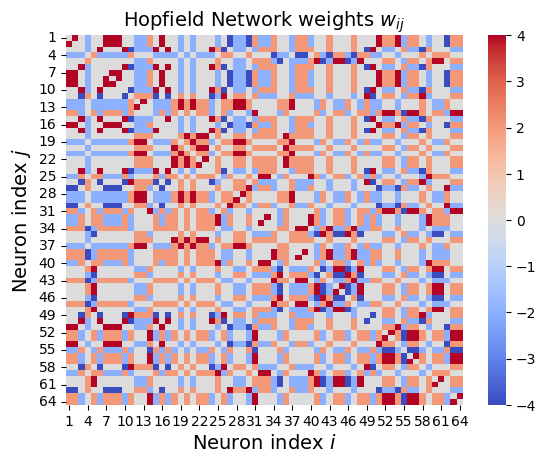

In [10]:
# Get weights after the training
W1 = hopnet.get_weights()

# Plot weights
ax = sns.heatmap(W1, cmap="coolwarm")

# Set custom ticks
step = 3  # Define the step size
x_ticks = np.arange(0, W1.shape[1], step)
y_ticks = np.arange(0, W1.shape[0], step)

ax.set_xticks(x_ticks + 0.5)
ax.set_yticks(y_ticks + 0.5)
ax.set_xticklabels(x_ticks + 1)
ax.set_yticklabels(y_ticks + 1)

# Set title and labels
plt.title(r"Hopfield Network weights $w_{ij}$", size=14)
plt.xlabel(r"Neuron index $i$", size=14)
plt.ylabel(r"Neuron index $j$", size=14)

plt.show()

Importantly, all the values on the main diagonal of the matrix are zero, since $w_{ii} = 0$.
Moreover, the heatmap is symmetrix with respect to the main diagonal, size $w_{ij} = w_{ji}$.

## Use Hopfield Network

Finally, we can use the Hopfield network. That means, we have to initialize the values on the neurons and run the Hopfield network dynamics untill it converges to a stable pattern, which should be (hopefully) one of the training patterns.

### Noisy input

First, we use one of the training patterns and add noise. It means, we take certain randomly chosen subset of pixels and flip their values; $1 \to -1$ and vice versa. This can be done using `generate_noisy_pattern` function. The arguments of this function are the original pattern (NumPy array) and `noise_level` (float), which is the fraction of pixels to flip (default 0.1).

In [11]:
# Generate noisy input
noisy = generate_noisy_pattern(dataset[0], noise_level=0.2)

To inialize the weights of the Hopfield Network and run its dynamics we use `retrieve()` method.
The inputs to the method are the initial pattern (NumPy array) and optional parameter `max_iterations`, which is the maximum number of iteration steps. The output of the method is the final stable state of the Hopfield Network.

In [12]:
# Retrieve pattern from the noisy input
retrieved = hopnet.retrieve(noisy, max_iterations=50)

Finally, we compare the initial (noisy) pattern with the final one.

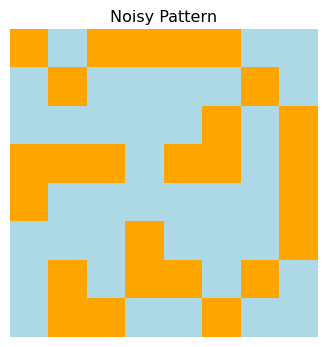

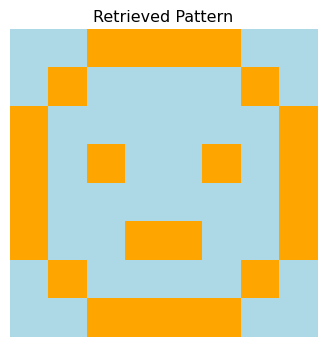

In [13]:
display_pattern(noisy, width=400, height=400, title="Noisy Pattern")
display_pattern(retrieved, width=400, height=400, title="Retrieved Pattern")

This demonstrates, that the Hopfield Network dynamics leads to one of the training patterns.

### Partial input

Second, we use the Hopfield Network to a partial image. We use one of the training samples and we set one half of the pixels in the image to -1.

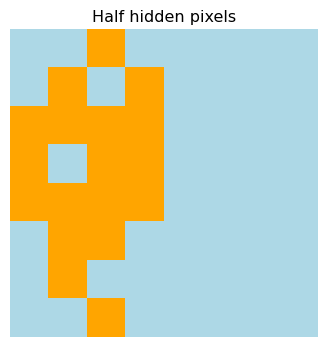

In [14]:
# Create a partial input
partial = dataset[1].reshape(8,8)  # Reshape to 8x8 image
partial[:,4:] = -1                 # set right half of the image pixels to -1
partial = partial.reshape(-1)      # Reshape back to 1D NumPy array

# Display the patter with hidden pixels
display_pattern(partial, width=400, height=400, title="Half hidden pixels")

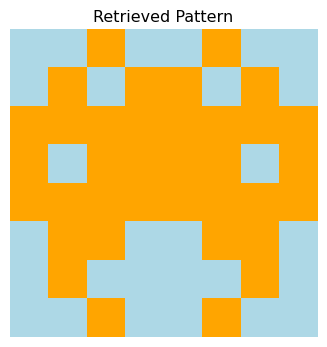

In [15]:
# Retrieve pattern from the partial input
retrieved = hopnet.retrieve(partial, max_iterations=50)

# Display the retrieved pattern
display_pattern(retrieved, width=400, height=400, title="Retrieved Pattern")

The Hopfield Network was able to reconstract the partial image.

## Analysis

If you want to analyze the work of Hopfield Network in more detail, you can use `retrieve_with_history()` method, which returns not only the final stable pattern, but also the history of all states (patterns) which occured throughout the network dynamics.

In [17]:
history = hopnet.retrieve_with_history(noisy, max_iterations=50)

print(f"Numbef of iterations: {len(history):d}")

Numbef of iterations: 13


You can export all the patterns in history and use them to create a video or futher analysis.

In [18]:
for i, state in enumerate(history, start=1):
    figname=f"pattern_{i:02d}.png"
    display_pattern(state, width=400, height=400, dpi=96, figname=figname)

Moreover, we can calculate the energy of the Hopfield Network.
For a given configuration, the energy is given by
\begin{equation}
    E = -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N w_{ij}\, s_i\, s_j\,,
\end{equation}
where $s_i$, and $s_j$ are the values on the $i$-th and $j$-th neurons, which can be $-1$ or $+1$.
$w_{ij}$ is the weight of the connection between $i$-th and $j$-th neuron.
The factor $1/2$ before the sum comes from the fact that both $w_{ij}$ and $w_{ji}$ are included in the sum, and we know that $w_{ij} = w_{ji}$.

For a given pattern, the energy of the Hopfield Network can be obtained using `energy()` method.
We can calculate energies of all patterns in the history as follows.

In [19]:
energy = [hopnet.energy(pattern) for pattern in history]

We can plot how energy changes during the Hopfield Network dynamics.

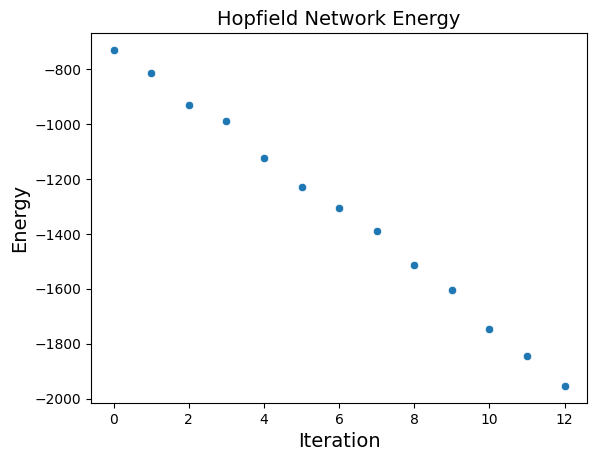

In [20]:
# Plot the energy dependence
sns.scatterplot(energy)

# Set title and labels
plt.title("Hopfield Network Energy", size=14)
plt.xlabel("Iteration", size=14)
plt.ylabel("Energy", size=14)

plt.show()

One can see that the energy of the Hopfield Network always decreases during the dynamics.

## How to cotinue

* Try to train Hopfield Network using more training data. How does it change the reliability and performance of the networks?
* Define your own patterns and train the Hopfield Network
* Create bigger training images (eg. 10x10 or 12x12) and observe how the performace of the bigger Hopfield Network changes.

## Additional reading

* [Wikipedia](https://en.wikipedia.org/wiki/Hopfield_network)
* [geeksforgeeks.org](https://www.geeksforgeeks.org/hopfield-neural-network/)
* [PRIMO.ai](https://primo.ai/index.php/Hopfield_Network_%28HN%29)